In [50]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
# import file with data
data = pd.read_csv("Volumetric_features.csv")
data.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [51]:
# Splitting data
# Import train_test_split function
from sklearn.model_selection import train_test_split
import numpy as np
properties = list(data.columns.values)
properties.remove('Age') # remove the outcome
# print(properties)
X = data[properties]
y = data['Age'] # y vector is the Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 80% training and 20% test

In [52]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # arrange data into standard normal distribution (mean = 0, unit variance) -- improves accuracy
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [53]:
import math
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
print("Score: ", reg.score(X_train, y_train))

mlrTrain_predictY = reg.predict(X_train)
mlrTest_predictY = reg.predict(X_test)

mlr_trainR2 = r2_score(y_train, mlrTrain_predictY)
mlr_testR2 = r2_score(y_test, mlrTest_predictY)

print("MLR Performance on Training Model (R^2): ", mlr_trainR2)
print("MLR Performance on Testing Model (R^2): ", mlr_testR2)

# Print RMSE (Accuracy for regression)
mlrTrain_RMSE = math.sqrt(mean_squared_error(y_train, mlrTrain_predictY))
mlrTest_RMSE = math.sqrt(mean_squared_error(y_test, mlrTest_predictY))

print("Training RMSE: ", mlrTrain_RMSE)
print("Testing RMSE: ", mlrTest_RMSE)
# print("MLR Predicted Y training: ", mlrTrain_predictY)
# print("MLR Predicted Y testing: ", mlrTest_predictY)

Score:  0.8628641689774782
MLR Performance on Training Model (R^2):  0.8628641689774782
MLR Performance on Testing Model (R^2):  0.8522863175244031
Training RMSE:  7.4185785474131665
Testing RMSE:  7.753514984414375


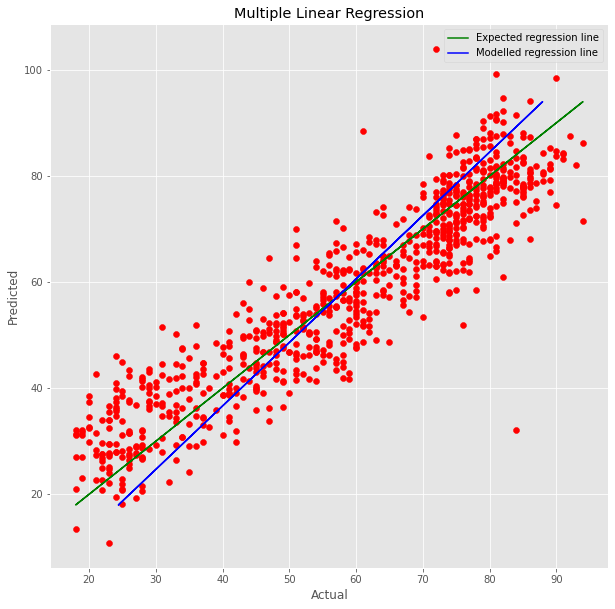

In [54]:
# Regression plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
with plt.style.context('ggplot'):
    plt.scatter(y_test, mlrTest_predictY, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, mlrTest_predictY, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Modelled regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()
    plt.title("Multiple Linear Regression")